In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ver

Idioma-Calificacion

Genero-Idioma

Genero-Anno

In [2]:
df=pd.read_csv('data/NetflixOriginals.csv', encoding="latin-1")     ### cambio el 'encoding' ya que el dataset contiene caracteres no incluidos en 'utf-8'
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


##### Al parecer no hay valores no nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


##### Vamos a ver que idiomas existen en el DataSet para intentar buscar una relacion entre el idioma y la calificacion en IBM

In [5]:
df.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

##### Creamos un diccionario con los idiomas y su valor numerico

In [6]:
idiomas={}
j=0
for i in  df.Language.unique():
    idiomas[i]=j
    j+=1
    
idiomas

{'English/Japanese': 0,
 'Spanish': 1,
 'Italian': 2,
 'English': 3,
 'Hindi': 4,
 'Turkish': 5,
 'Korean': 6,
 'Indonesian': 7,
 'Malay': 8,
 'Dutch': 9,
 'French': 10,
 'English/Spanish': 11,
 'Portuguese': 12,
 'Filipino': 13,
 'German': 14,
 'Polish': 15,
 'Norwegian': 16,
 'Marathi': 17,
 'Thai': 18,
 'Swedish': 19,
 'Japanese': 20,
 'Spanish/Basque': 21,
 'Spanish/Catalan': 22,
 'English/Swedish': 23,
 'English/Taiwanese/Mandarin': 24,
 'Thia/English': 25,
 'English/Mandarin': 26,
 'Georgian': 27,
 'Bengali': 28,
 'Khmer/English/French': 29,
 'English/Hindi': 30,
 'Tamil': 31,
 'Spanish/English': 32,
 'English/Korean': 33,
 'English/Arabic': 34,
 'English/Russian': 35,
 'English/Akan': 36,
 'English/Ukranian/Russian': 37}

##### Cambiamos los idiomas por su valor numerico correspondiente

In [7]:
df.Language= df.Language.map(lambda x: idiomas[x])
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,0
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,1
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,2
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,3
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,4
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,3
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,37
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,3
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,12


### Intentamos buscar una primera correlacion

##### No existe tal correlacion, es mas bien neutra

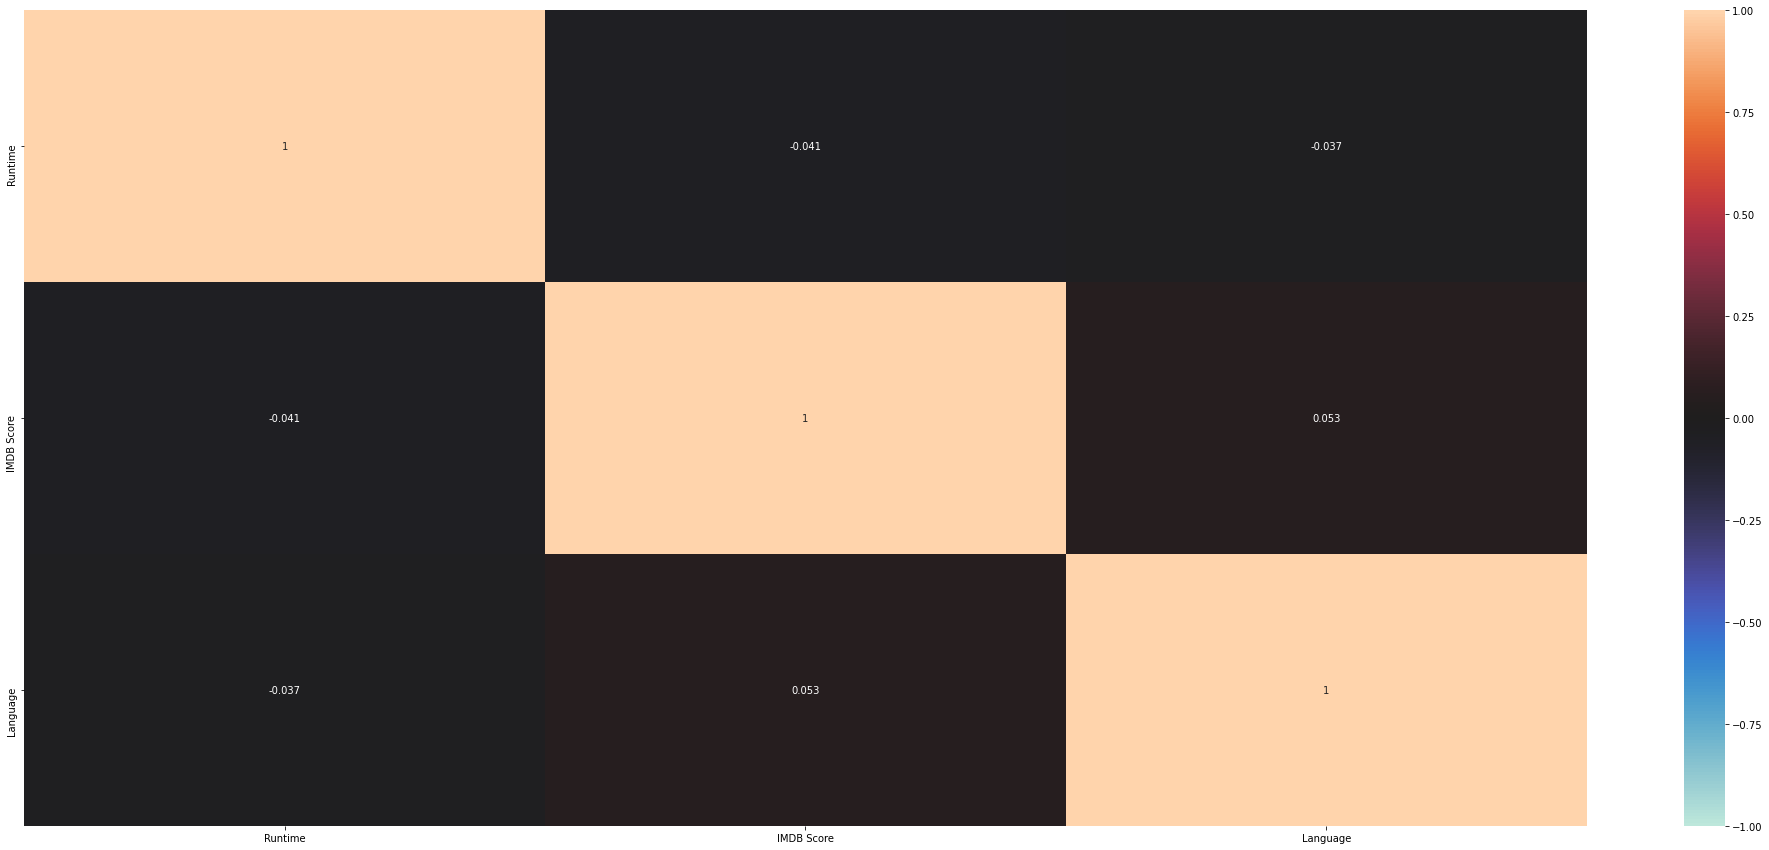

In [8]:
plt.subplots(figsize=(35,15))
sns.heatmap(df.corr(),center=0,annot=True, vmin=-1,vmax=1);

### Hacemos lo mismo con los Generos

##### Tampoco parece existir ninguna correlacion evidente aunque los valores sean un poco mas altos


In [9]:
generos={}
j=0
for i in  df.Genre.unique():
    generos[i]=j
    j+=1
    

df.Genre= df.Genre.map(lambda x: generos[x])

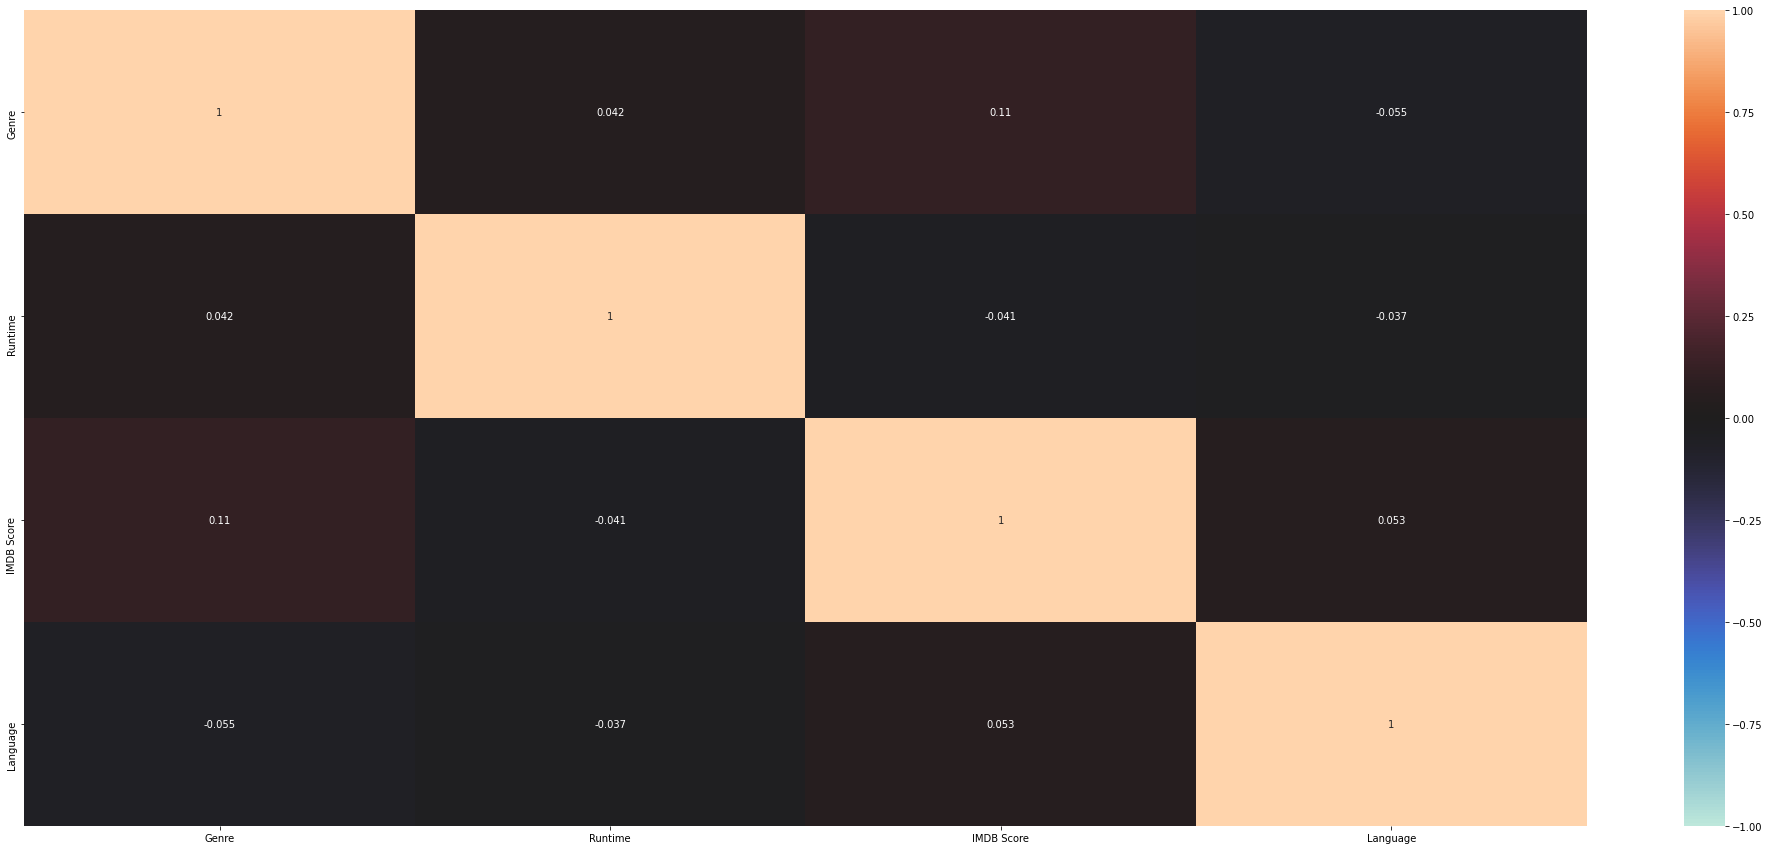

In [10]:
plt.subplots(figsize=(35,15))
sns.heatmap(df.corr(),center=0,annot=True, vmin=-1,vmax=1);

In [ ]:
### barplot


Text(0.5, 1.0, 'Genre IMBD')

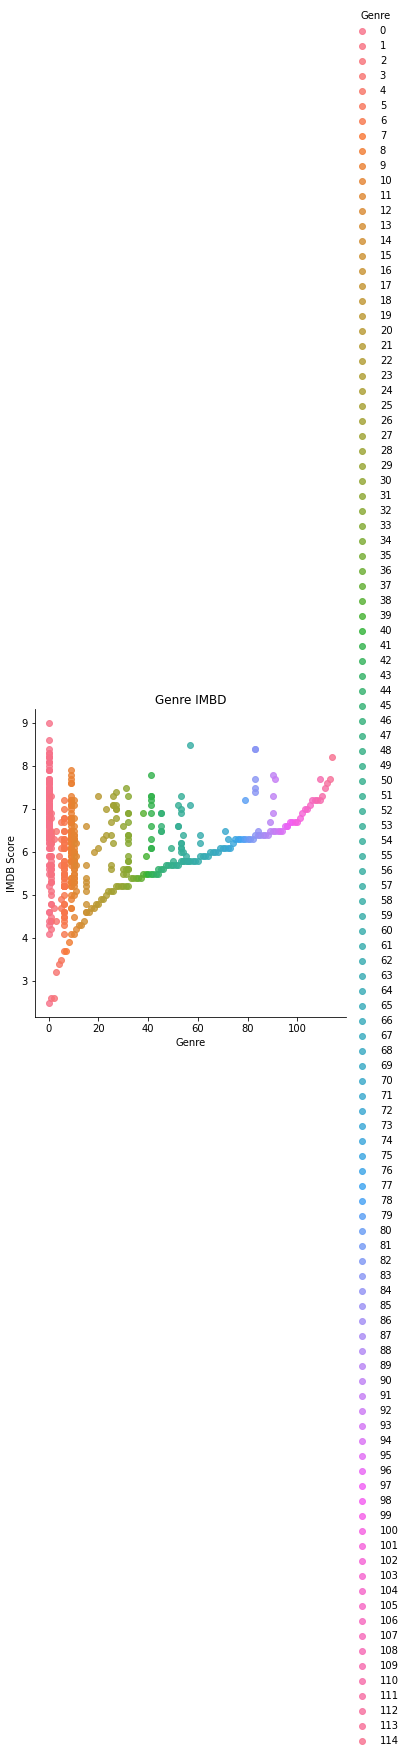

In [19]:
sns.lmplot(x = "Genre", y = "IMDB Score", data = df, fit_reg = False, hue = "Genre");
plt.title('Genre IMBD')

Text(0.5, 1.0, 'Genre IMBD')

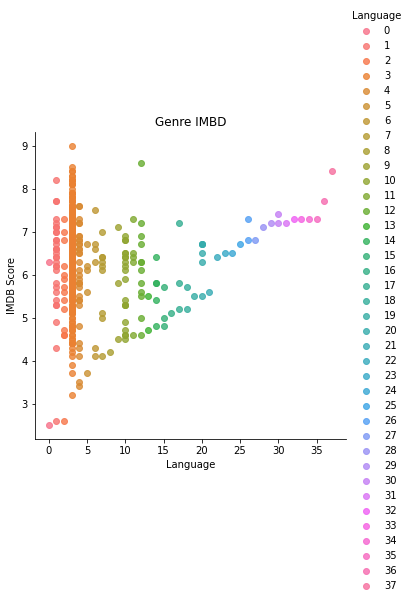

In [20]:
sns.lmplot(x = "Language", y = "IMDB Score", data = df, fit_reg = False, hue = "Language");
plt.title('Genre IMBD')

#### Parece haber dos posibles correlaciones una entre Genre-ImdbScore y Imdb-Score-Language

In [29]:
for i in idiomas:
    print(i,"==",idiomas[i])

English/Japanese == 0
Spanish == 1
Italian == 2
English == 3
Hindi == 4
Turkish == 5
Korean == 6
Indonesian == 7
Malay == 8
Dutch == 9
French == 10
English/Spanish == 11
Portuguese == 12
Filipino == 13
German == 14
Polish == 15
Norwegian == 16
Marathi == 17
Thai == 18
Swedish == 19
Japanese == 20
Spanish/Basque == 21
Spanish/Catalan == 22
English/Swedish == 23
English/Taiwanese/Mandarin == 24
Thia/English == 25
English/Mandarin == 26
Georgian == 27
Bengali == 28
Khmer/English/French == 29
English/Hindi == 30
Tamil == 31
Spanish/English == 32
English/Korean == 33
English/Arabic == 34
English/Russian == 35
English/Akan == 36
English/Ukranian/Russian == 37


In [33]:
for i in generos:
    print(i,"==",generos[i])


Documentary == 0
Thriller == 1
Science fiction/Drama == 2
Horror thriller == 3
Mystery == 4
Action == 5
Comedy == 6
Heist film/Thriller == 7
Musical/Western/Fantasy == 8
Drama == 9
Romantic comedy == 10
Action comedy == 11
Horror anthology == 12
Political thriller == 13
Superhero-Comedy == 14
Horror == 15
Romance drama == 16
Anime / Short == 17
Superhero == 18
Heist == 19
Western == 20
Animation/Superhero == 21
Family film == 22
Action-thriller == 23
Teen comedy-drama == 24
Romantic drama == 25
Animation == 26
Aftershow / Interview == 27
Christmas musical == 28
Science fiction adventure == 29
Science fiction == 30
Variety show == 31
Comedy-drama == 32
Comedy/Fantasy/Family == 33
Supernatural drama == 34
Action/Comedy == 35
Action/Science fiction == 36
Romantic teenage drama == 37
Comedy / Musical == 38
Musical == 39
Science fiction/Mystery == 40
Crime drama == 41
Psychological thriller drama == 42
Adventure/Comedy == 43
Black comedy == 44
Romance == 45
Horror comedy == 46
Christian mus

In [56]:
df[df.Genre==35]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
99,"Game Over, Man!",35,"March 23, 2018",101,5.4,3
